<span style="color: red; font-weight: bold; text-align: center; display: block; margin: auto; font-size: 2em;">BottleNeck</span>

**Résumé de la demande :**

La mission consiste en trois étapes principales :

1. **Rapprochement des exports :**
   - Rapprocher les données de l'ERP (références produit, prix, stock) avec celles de la boutique en ligne (nom, description, ventes).
   - Utiliser un tableau Excel créé par Sylvie pour établir le lien entre les références du produit dans l'ERP (product_id) et celles de la boutique en ligne (SKU).

2. **Calcul du chiffre d'affaires :**
   - Une fois le rapprochement effectué, fournir le chiffre d'affaires par produit.
   - Calculer le total du chiffre d'affaires réalisé en ligne.

3. **Analyse des prix des produits :**
   - Détecter d'éventuelles valeurs aberrantes dans les prix des produits.
   - Liste des valeurs aberrantes et représentation graphique pour une meilleure lisibilité.

Les exports nécessaires ainsi qu'un tableau Excel pour le lien entre les références seront fournis. La présentation des résultats se fera lors de la prochaine réunion de COPIL, pouvant être sous forme de présentation ou d'un notebook utilisant R ou Python.

<span style="color:blue; font-weight:bold; font-size:2em;">I] Installation</span>

In [270]:
#Importations des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [271]:
#chemin_fichier1_csv = 'C:\Users\Rorsharks\Desktop\P5\Fichier_erp.csv'

# Chargez les données depuis le fichier CSV dans un DataFrame
stock = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\P5\\Fichier_erp.csv', sep=';')

produits = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\P5\\Fichier_web.csv', sep=';', encoding='ISO-8859-1')

liaison = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\P5\\Fichier_liaison.csv', sep=';')

# Affichez les premières lignes du DataFrame
display(stock.head())

display(produits.head())

display(liaison.head())

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<span style="color: #FF8C00;">Il semble que certaines données soient marquées comme `NaN` (Not a Number), tandis que d'autres colonnes affichent des valeurs égales à zéro, notamment pour les colonnes "forerp" et "web".</span>

<span style="color: #FF8C00;">Les colonnes suivantes présentent des situations particulières :**</span>

- <span style="color: #FF8C00;"> Downloadable**: Il est possible qu'aucun produit n'ait été téléchargé, expliquant ainsi l'absence de données dans cette colonne.</span>

- <span style="color: #FF8C00;">Rating_count**: Certains produits peuvent ne pas avoir reçu de notation sur le site web, se traduisant par une valeur nulle dans cette colonne. Une autre possibilité est qu'ils aient reçu une notation de zéro.</span>

- <span style="color: #FF8C00;">Post_parent**: Il est envisageable que certains éléments ne possèdent pas de poste parent ou ne soient pas associés à un système post_parent.</span>

- <span style="color: #FF8C00;">Post_mime_type**: Tous les produits ne contiennent pas nécessairement de photo sur le site web, ce qui pourrait expliquer des valeurs vides ou spécifiques dans cette colonne.</span>

- <span style="color: #FF8C00;">Comment_count**: Il est envisageable que certains produits n'aient reçu aucun commentaire, d'où la présence de valeurs nulles dans cette colonne.</span>

<span style="color:blue; font-weight:bold; font-size:2em;">I.I]Vérification des fichiers</span>

In [272]:
# Charger le fichier CSV dans un DataFrame
stock = pd.read_csv("fichier_erp.csv", delimiter=';')

# Vérifier les doublons
doublons = stock[stock.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = stock[stock.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("Valeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")

# Afficher des statistiques générales sur le DataFrame (en excluant la colonne product_id)
print("\nStatistiques générales (hors product_id):")
display(stock.drop('product_id', axis=1).describe())

print("\nTypes de données par colonne:")
print(stock.dtypes)
stock.shape


Aucun doublon détecté.
Aucune valeur NaN détectée.

Statistiques générales (hors product_id):


,onsale_web,stock_quantity
count,825.000000,825.000000
mean,0.869091,26.583030
std,0.337506,45.875948
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,11.000000
75%,1.000000,34.000000
max,1.000000,578.000000



Types de données par colonne:
product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object


(825, 5)

<span style="color: #FF8C00;"><strong>Analyse statistique préliminaire de la DataFrame avant le nettoyage :</strong></span>
<span style="color: #FF8C00;">Cette étape permet d'explorer les données, de détecter d'éventuels problèmes, de planifier le nettoyage, d'orienter le processus, et de se préparer à l'analyse ultérieure.</span>

<span style="color: #FF8C00;"><strong>Résumé des résultats :</strong></span>
- <span style="color: #FF8C00;">Aucun doublon détecté, aucune valeur NaN présente.</span>

<span style="color: #FF8C00;"><strong>Colonnes clés :</strong></span>

<span style="color: #FF8C00;">**`onsale_web` :**</span>
- <span style="color: #FF8C00;">La plupart des produits sont disponibles en ligne (75e percentile à 1), avec une légère variabilité (écart-type d'environ 0.34).</span>

<span style="color: #FF8C00;">**`stock_quantity` :**</span>
- <span style="color: #FF8C00;">Une variabilité significative dans les quantités de stock (écart-type d'environ 45.88), allant de -1 à 578.</span>
- <span style="color: #FF8C00;">La colonne `price` est de type objet, suggérant peut-être une conversion en type numérique.</span>


In [273]:
# Vérifier du fichier_liaison

# Charger le fichier CSV dans un DataFrame (remplacez "web.csv" par le chemin de votre fichier CSV)
liaison = pd.read_csv("fichier_liaison.csv", delimiter=';')

# Vérifier les doublons
doublons = liaison[liaison.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = liaison[liaison.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("Valeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")

# Afficher des statistiques générales sur le DataFrame (en excluant les colonnes non numériques)
print("\nStatistiques générales:")
display(liaison.describe(include='all'))

# Afficher les types de données par colonne
print("\nTypes de données par colonne:")
print(liaison.dtypes)

# Afficher les premières lignes du DataFrame
print("\nPremières lignes du DataFrame:")
print(liaison.head())

Aucun doublon détecté.
Valeurs NaN détectées:
     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]

Statistiques générales:


,product_id,id_web
count,825.000000,734
unique,NaN,734
top,NaN,15298
freq,NaN,1
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN



Types de données par colonne:
product_id     int64
id_web        object
dtype: object

Premières lignes du DataFrame:
   product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815


In [274]:
# on créé une nouvelle colonne 'sku' égale à la colonne 'id_web', qu'on supprime ensuite
liaison['sku'] = liaison['id_web']
liaison = liaison.drop(columns = ['id_web'])

# on affiche les premières lignes
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<span style="color: #FF8C00;"><strong>Résumé des Résultats :</strong></span>

<span style="color: #FF8C00;">Pour la colonne <strong>`product_id` :</strong></span>
- <span style="color: #FF8C00;">Pas de doublons.</span>
- <span style="color: #FF8C00;">Valeur la plus fréquente : Manquante (NaN) avec une fréquence de 1.</span>
- <span style="color: #FF8C00;">Moyenne : Environ 5162.60.</span>
- <span style="color: #FF8C00;">Écart-type : Environ 902.64, indiquant une variabilité autour de la moyenne.</span>
- <span style="color: #FF8C00;">Valeur minimale : 3847, valeur maximale : 7338.</span>

<span style="color: #FF8C00;">Pour la colonne <strong>`id_web` :</strong></span>
- <span style="color: #FF8C00;">Valeur la plus fréquente : 15298, fréquence : 1.</span>
- <span style="color: #FF8C00;">Note : Des valeurs manquantes (NaN) sont présentes dans cette colonne, suggérant un traitement nécessaire.</span>

<span style="color: #FF8C00;">Création d'une nouvelle colonne 'sku' dans le DataFrame 'liaison', en copiant les valeurs de la colonne 'id_web', puis supprime la colonne 'id_web', réorganisant ainsi la structure du DataFrame en remplaçant 'id_web' par 'sku'.</span>



In [275]:
# Vérifier du fichier_web

# Charger le fichier CSV dans un DataFrame (remplacez "web.csv" par le chemin de votre fichier CSV)
produits = pd.read_csv("fichier_web.csv", encoding='ISO-8859-1', on_bad_lines='skip', skip_blank_lines=True, delimiter=';')

# Vérifier les doublons
doublons = produits[produits.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = produits[produits.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("Valeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")


# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales:")
display(produits.describe())
produits.shape


Doublons détectés:
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
17    NaN        0             0             0             NaN          NaN   
82    NaN        0             0             0             NaN          NaN   
97    NaN        0             0             0             NaN          NaN   
121   NaN        0             0             0             NaN          NaN   
126   NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1378  NaN        0             0             0             NaN          NaN   
1421  NaN        0             0             0             NaN          NaN   
1448  NaN        0             0             0             NaN          NaN   
1450  NaN        0             0             0             NaN          NaN   
1496  NaN        0             0             0             NaN          NaN   

     tax_status  tax_class  post

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


(1513, 28)

<span style="color: #FF8C00;"><strong>Résumé des Résultats :</strong></span>
- <span style="color: #FF8C00;">Des doublons et des valeurs NaN sont présents dans les données.</span>

<span style="color: #FF8C00;"><strong>Résumé des Statistiques :</strong></span>
- <span style="color: #FF8C00;">Les colonnes telles que 'virtual', 'downloadable', 'rating_count', 'average_rating', etc., affichent des variations dans le nombre total d'entrées non manquantes.</span>
- <span style="color: #FF8C00;">La moyenne de 'total_sales' est d'environ 3.86, présentant une certaine variabilité autour de la moyenne.</span>
- <span style="color: #FF8C00;">Des valeurs constantes de zéro dans plusieurs colonnes suggèrent une possible absence de diversité.</span>
- <span style="color: #FF8C00;">La colonne 'average_rating' contient des valeurs NaN, indiquant des données manquantes ou indéfinies.</span>

#### A.I) Analyse du Fichier ERP


In [276]:
# Nettoyage du fichier_erp

# Conversion de la colonne "price" en type numérique 
stock['price'] = pd.to_numeric(stock['price'], errors='coerce')

display(stock)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,NaN,0,outofstock
1,3849,1,NaN,0,outofstock
2,3850,1,NaN,0,outofstock
3,4032,1,NaN,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,NaN,23,instock
823,7329,0,NaN,14,instock


In [277]:
# Charger le fichier CSV dans un DataFrame
stock = pd.read_csv("fichier_erp.csv", delimiter=';')

# Convertir la colonne "price" en numérique en conservant les valeurs originales si la conversion échoue
stock['price_numeric'] = pd.to_numeric(stock['price'], errors='coerce')

# Afficher les lignes où la conversion a échoué
failed_conversion_rows = stock[stock['price_numeric'].isnull()]
print("Lignes où la conversion a échoué :")
print(failed_conversion_rows)

# Conserver les valeurs originales là où la conversion a échoué
stock['price_numeric'] = stock['price_numeric'].combine_first(stock['price'])

Lignes où la conversion a échoué :
     product_id  onsale_web price  stock_quantity stock_status  price_numeric
0          3847           1  24,2               0   outofstock            NaN
1          3849           1  34,3               0   outofstock            NaN
2          3850           1  20,8               0   outofstock            NaN
3          4032           1  14,1               0   outofstock            NaN
5          4040           1  34,3               0   outofstock            NaN
..          ...         ...   ...             ...          ...            ...
787        6930           1   8,4              83      instock            NaN
792        7023           1  27,5              15      instock            NaN
822        7247           1  54,8              23      instock            NaN
823        7329           0  26,5              14      instock            NaN
824        7338           1  16,3              45      instock            NaN

[609 rows x 6 columns]


In [278]:
# Remplacer les virgules par des points dans la colonne "price"
stock['price'] = stock['price'].str.replace(',', '.')

# Tenter la conversion en numérique
stock['price_numeric'] = pd.to_numeric(stock['price'], errors='coerce')

# Afficher les lignes où la conversion a échoué
failed_conversion_rows = stock[stock['price_numeric'].isnull()]
print("Lignes où la conversion a échoué :")
print(failed_conversion_rows)

# Conserver les valeurs originales là où la conversion a échoué
stock['price_numeric'] = stock['price_numeric'].combine_first(stock['price'])
display(stock)

Lignes où la conversion a échoué :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, price_numeric]
Index: []


,product_id,onsale_web,price,stock_quantity,stock_status,price_numeric
0,3847,1,24.2,0,outofstock,24.2
1,3849,1,34.3,0,outofstock,34.3
2,3850,1,20.8,0,outofstock,20.8
3,4032,1,14.1,0,outofstock,14.1
4,4039,1,46,0,outofstock,46.0
...,...,...,...,...,...,...
820,7203,0,45,30,instock,45.0
821,7204,0,45,9,instock,45.0
822,7247,1,54.8,23,instock,54.8
823,7329,0,26.5,14,instock,26.5


#### B.I) Analyse du Fichier liaison

In [279]:
# Remplacer les NaN par 0 dans tout le DataFrame
liaison = liaison.fillna(0)
display(liaison)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,0
821,7204,0
822,7247,13127-1
823,7329,14680-1


In [280]:
liaison['sku'].unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', 0, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209',

In [281]:
# on recherche la valeur 'bon-cadeau-25-euros' 
liaison.loc[liaison['sku'] == 'bon-cadeau-25-euros']

,product_id,sku
443,4954,bon-cadeau-25-euros


In [282]:
liaison.loc[liaison['sku'] == 'bon-cadeau-25-euros']

,product_id,sku
443,4954,bon-cadeau-25-euros


In [283]:
# on affiche les valeurs uniques prises par la variable
liaison['product_id'].unique()

array([3847, 3849, 3850, 4032, 4039, 4040, 4041, 4042, 4043, 4045, 4046,
       4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057,
       4058, 4059, 4060, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069,
       4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4081,
       4083, 4084, 4085, 4086, 4087, 4090, 4092, 4094, 4095, 4096, 4097,
       4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108,
       4115, 4130, 4132, 4137, 4138, 4139, 4141, 4142, 4144, 4146, 4147,
       4148, 4149, 4150, 4151, 4152, 4153, 4154, 4155, 4156, 4157, 4158,
       4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4170,
       4171, 4172, 4173, 4174, 4176, 4177, 4178, 4179, 4180, 4181, 4182,
       4183, 4186, 4187, 4188, 4190, 4191, 4192, 4193, 4194, 4195, 4196,
       4197, 4198, 4200, 4201, 4202, 4203, 4204, 4205, 4207, 4208, 4209,
       4210, 4211, 4212, 4213, 4215, 4216, 4217, 4219, 4220, 4221, 4222,
       4223, 4224, 4225, 4227, 4228, 4229, 4231, 42

In [284]:
# on affiche les valeurs uniques prises par la variable
liaison['sku'].unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', 0, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209',

#### C.I) Analyse du Fichier WEB

In [285]:
# Remplacer les valeurs NaN par une valeur par défaut (par exemple, 0) dans le fichier produit
# produits = produits.fillna(0)

# Sélectionne les lignes duplicatées basées sur la colonne 'product_id' dans le DataFrame 'liaison'.
liaison_duplications = liaison.loc[liaison['product_id'].duplicated(keep=False), :]

# Affiche les premières lignes du DataFrame 'produits'.
produits.head()
produits.shape

(1513, 28)

#### A.II) Merge fichier liaison et erp

In [286]:
# Fusionner les DataFrames 'stock' et 'liaison' sur la colonne 'product_id'
liaison_stock = pd.merge(stock, liaison, on = 'product_id')
liaison_stock = liaison_stock.drop('price', axis=1)

# Afficher les premières lignes du DataFrame
print(liaison_stock.shape)

liaison_stock.head()

(825, 6)


,product_id,onsale_web,stock_quantity,stock_status,price_numeric,sku
0,3847,1,0,outofstock,24.2,15298
1,3849,1,0,outofstock,34.3,15296
2,3850,1,0,outofstock,20.8,15300
3,4032,1,0,outofstock,14.1,19814
4,4039,1,0,outofstock,46.0,19815


#### B.II) Merge fichier liaison et stock

In [287]:
# Supprime les lignes du DataFrame où la référence SKU ('sku') est manquante.
produits_no_nan_sku = produits.dropna(subset=['sku'])
produits_no_nan_sku.shape

(1428, 28)

In [288]:
# Fusionner les DataFrames après la conversion en minuscules
resultat_final = pd.merge(liaison_stock, produits_no_nan_sku, on='sku')

print(resultat_final.shape)
resultat_final.head()
resultat_final.duplicated(subset = 'product_id')

(1428, 33)


0       False
1        True
2       False
3        True
4       False
        ...  
1423     True
1424    False
1425     True
1426    False
1427     True
Length: 1428, dtype: bool

In [289]:
resultat_final.duplicated(subset = 'product_id')

0       False
1        True
2       False
3        True
4       False
        ...  
1423     True
1424    False
1425     True
1426    False
1427     True
Length: 1428, dtype: bool

In [290]:
print(resultat_final['post_type'].value_counts())

product       714
attachment    714
Name: post_type, dtype: int64


In [291]:
print(resultat_final.shape)
resultat_final.head()

(1428, 33)


,product_id,onsale_web,stock_quantity,stock_status,price_numeric,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,0,outofstock,24.2,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,1,0,outofstock,24.2,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3849,1,0,outofstock,34.3,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
3,3849,1,0,outofstock,34.3,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,3850,1,0,outofstock,20.8,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


<span style="color: #FF8C00;">Filtrage sur la DataFrame resultat_final, en ne conservant que les lignes où la colonne 'post_type' a la valeur 'product'.</span>

<span style="color: #FF8C00;">Par ailleurs, dans le traitement de nos fichiers et l'élaboration des calcul, j'ai procédé à un flitre sur la DataFrame resultat_final, en ne conservant que les lignes où la colonne 'post_type' a la valeur 'product'. Je me suis rendu compte que si je n'effectuer pas ce filtre, j'avais des valeurs négatives dans le CA, dans le stocks ainsi que dans les prix. Ce filtrage spécifique permet de me concentrer uniquement par produits et permet donc d'éliminer des données non pertinentes et assuré la cohérence des calculs.</span>
<span style="color: #FF8C00;">Les avantages sont de conserver uniquement les produits néanmoins le risque et la perte de quelques élements de valeurs.</span>

<span style="color: #FF8C00;">Si on utliser pas ce filtre on aurait par exemple des pertes d'informations importantes notamment dans le calcul du chiffre d'affaire (exemple : resultat_final = resultat_final.dropna(axis=1))</span>

In [292]:
# Supprimer la colonne "product_id_y" de la DataFrame "resultat_final"
resultat_final = resultat_final.dropna(axis=1)

# Filtrer et ne garder que les post_type product
resultat_final = resultat_final.loc[resultat_final['post_type'] == 'product']

resultat_final.head()

,product_id,onsale_web,stock_quantity,stock_status,price_numeric,sku,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,1,0,outofstock,24.2,15298,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,3849,1,0,outofstock,34.3,15296,0,0,0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
5,3850,1,0,outofstock,20.8,15300,0,0,0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
6,4032,1,0,outofstock,14.1,19814,0,0,0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
8,4039,1,0,outofstock,46.0,19815,0,0,0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [293]:
resultat_final.shape

(714, 26)

<span style="color:blue; font-weight:bold; font-size:2em;">III]Calculs</span>

#### A.III) Calcul du chiffre d'affaires

In [294]:
# on créé une colonne 'ca_web_par_produit' qui est égale au nb de ventes x le prix

resultat_final['ca'] = resultat_final['total_sales'] * resultat_final['price_numeric']

# on affiche les premières lignes
resultat_final.head()

,product_id,onsale_web,stock_quantity,stock_status,price_numeric,sku,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
0,3847,1,0,outofstock,24.2,15298,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,145.2
3,3849,1,0,outofstock,34.3,15296,0,0,0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
5,3850,1,0,outofstock,20.8,15300,0,0,0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
6,4032,1,0,outofstock,14.1,19814,0,0,0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,42.3
8,4039,1,0,outofstock,46.0,19815,0,0,0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0


In [295]:
#Vérification
resultat_final.shape

(714, 27)

In [296]:
ca_produits_sum = round(resultat_final['ca'].sum(), 2)
print(f"Le chiffre d'affaires réalisé en ligne est de {ca_produits_sum} €")

# Triez le DataFrame par chiffre d'affaires dans l'ordre décroissant
resultat_final = resultat_final.sort_values(by='ca', ascending=False)

# Sélectionnez les 10 premières lignes (top 10)
top_10 = resultat_final.head(10)

# Arrondissez le chiffre d'affaires dans le top 10 à deux décimales
top_10['ca'] = top_10['ca'].round(2)

# Affichez les informations sur le top 10
display(top_10[['post_name', 'product_id', 'ca']])

Le chiffre d'affaires réalisé en ligne est de 70568.6 €


C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_10664\1469444159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['ca'] = top_10['ca'].round(2)


,post_name,product_id,ca
388,champagne-gosset-grand-blanc-de-blanc,4334,4704.0
143,champagne-gosset-grand-rose,4144,4263.0
436,cognac-frapin-vip-xo,4402,2288.0
141,champagne-gosset-grand-millesime-2006,4142,1590.0
138,gosset-champagne-grande-reserve,4141,1560.0
402,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,4355,1391.5
399,champagne-egly-ouriet-grand-cru-millesime-2008,4352,1125.0
158,elian-daros-cotes-du-marmandais-clos-baquey-2015,4153,1044.0
1303,domaine-giudicelli-patrimonio-blanc-2019,6206,1033.2
61,gilles-robin-crozes-hermitage-papillon-2019,4068,1029.2


In [297]:
# Triez le DataFrame par chiffre d'affaires dans l'ordre décroissant
resultat_final = resultat_final.sort_values(by='ca', ascending=False)

# Sélectionnez les 5 premières lignes (top 5)
top_5 = resultat_final.head(5)

# Arrondissez le chiffre d'affaires dans le top 5 à deux décimales
top_5['ca'] = top_5['ca'].round(2)

# Affichez les informations sur le top 5
display(top_5[['post_name', 'product_id', 'ca']])

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_10664\4079872414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['ca'] = top_5['ca'].round(2)


,post_name,product_id,ca
388,champagne-gosset-grand-blanc-de-blanc,4334,4704.0
143,champagne-gosset-grand-rose,4144,4263.0
436,cognac-frapin-vip-xo,4402,2288.0
141,champagne-gosset-grand-millesime-2006,4142,1590.0
138,gosset-champagne-grande-reserve,4141,1560.0


<span style="color: #FF8C00;"><strong>Observations sur les Produits :</strong></span>
- <span style="color: #FF8C00;">Les 10 premiers et 5 premiers produits semblent être exclusivement des champagnes, cependant, il est important de noter que le prix élevé des champagnes peut ne pas être un indicateur fiable des meilleures ventes réelles.</span>

In [298]:
# Filtrer les valeurs supérieures à 0
valeurs_positives = resultat_final[resultat_final['ca'] > 0]

# Sélectionner les 20 premières lignes avec les valeurs les plus faibles
top_20_faibles = valeurs_positives.nsmallest(20, 'ca')

# Afficher toutes les informations triées par chiffre d'affaires croissant
display(top_20_faibles[['post_name', 'product_id', 'ca']])

,post_name,product_id,ca
718,chateau-turcaud-rose-2019,4858,6.5
882,domaine-de-montgilet-anjou-rouge-2016-2,5056,7.5
192,ollieux-romanis-monsieur-pinot-2017,4171,7.8
305,parce-freres-igp-pays-oc-zoe-viognier-2019,4245,8.9
298,parce-freres-hommage-fernand-blanc-2019,4241,8.9
590,chateau-plaisance-fronton-rose-2019,4683,9.1
346,domaine-serol-cote-roannaise-cabochard-2016,4272,9.2
1256,borie-la-vitarele-pays-herault-cigales-2019,6070,9.3
579,domaine-rotier-gaillac-rouge-les-gravels-2016,4677,9.5
730,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,4867,9.9


In [299]:
#Vérification
resultat_final.head()

,product_id,onsale_web,stock_quantity,stock_status,price_numeric,sku,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,ca
388,4334,1,0,outofstock,49.0,7818,0,0,0,0.0,...,closed,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4704.0
143,4144,1,11,instock,49.0,1662,0,0,0,0.0,...,closed,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,4263.0
436,4402,1,8,instock,176.0,3510,0,0,0,0.0,...,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0
141,4142,1,8,instock,53.0,11641,0,0,0,0.0,...,closed,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1590.0
138,4141,1,1,instock,39.0,304,0,0,0,0.0,...,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1560.0


In [300]:
# Calcule et affiche l'asymétrie arrondie à deux décimales de la distribution des prix dans le DataFrame 'finalresltat_final'.
print(round(resultat_final['price_numeric'].skew(), 2))

2.58


<span style="color: #FF8C00;"><strong>Observation sur la Variabilité des Prix :</strong></span>
- <span style="color: #FF8C00;">Une variabilité des prix en fonction des produits est observée, ce qui est normal étant donné que le coût financier de l'achat peut varier significativement d'un produit à l'autre.</span>

<span style="color: #FF8C00;"><strong>Résumé de l'Asymétrie des Prix :</strong></span>
- <span style="color: #FF8C00;">Cela suggère que la majorité des produits ont des prix concentrés du côté des valeurs plus basses, avec quelques produits ayant des prix significativement plus élevés, étirant la distribution vers la droite.</span>


#### B.III.) Analyse des produits les plus fréquemment rencontrés

<span style="color: #FF8C00;"><strong>Résumé de la Vérification des Occurrences :</strong></span>
- <span style="color: #FF8C00;">La vérification des occurrences dans les fichiers a été effectuée pour identifier d'éventuels problèmes.</span>
- <span style="color: #FF8C00;">Une mise en relation a été établie entre les occurrences, les prix des produits, le chiffre d'affaires, et les niveaux de stock.</span>
- <span style="color: #FF8C00;">Cette analyse vise à détecter des anomalies, à valider l'intégrité des données, et à fournir des insights pour guider les décisions analytiques.</span>
- <span style="color: #FF8C00;">Les résultats obtenus peuvent orienter des actions correctives ou des ajustements dans le traitement des données en fonction des relations observées.</span>

In [301]:
# Compter les occurrences des produits
occurrences_produits = resultat_final['product_id'].value_counts()

# Afficher les 10 premières occurrences avec 'post_name', 'product_id', et 'ca'
top_occurrences_info = resultat_final[resultat_final['product_id'].isin(occurrences_produits.head(10).index)][['post_name', 'product_id', 'ca']]

# Afficher le résultat
print("Occurrences des produits avec 'post_name', 'product_id', et 'ca' :")
display(top_occurrences_info)

Occurrences des produits avec 'post_name', 'product_id', et 'ca' :


,post_name,product_id,ca
388,champagne-gosset-grand-blanc-de-blanc,4334,4704.0
759,domaine-des-croix-savigny-les-beaune-1er-cru-l...,4902,0.0
830,champagne-larmandier-bernier-terre-de-vertus-p...,4970,0.0
683,clos-du-mont-olivet-cotes-du-rhone-rose-farel-...,4778,0.0
676,domaine-saint-nicolas-fiefs-vendeens-rouge-cuv...,4758,0.0
566,pelle-menetou-salon-rouge-les-cris-2015,4671,0.0
569,pelle-menetou-salon-rouge-morogues-2017,4672,0.0
570,pelle-sancerre-rouge-la-croix-au-garde-2017,4673,0.0
575,domaine-rotier-gaillac-blanc-sec-renaissance-2015,4675,0.0
692,maurice-schoech-riesling-vendanges-tardives-2017,4784,0.0


In [302]:
# Compter les occurrences des produits
occurrences_produits = resultat_final['product_id'].value_counts()

# Ajouter une colonne 'occurrences' au DataFrame résultant
resultat_final_occurrences = resultat_final.merge(occurrences_produits.rename('occurrences'), left_on='product_id', right_index=True)

# Afficher le DataFrame résultant avec 'post_name', 'product_id', 'ca' et 'occurrences'
print("Occurrences des produits avec 'post_name', 'product_id', 'ca' et 'occurrences' :")
display(resultat_final_occurrences[['post_name', 'product_id', 'ca', 'occurrences']])

Occurrences des produits avec 'post_name', 'product_id', 'ca' et 'occurrences' :


,post_name,product_id,ca,occurrences
388,champagne-gosset-grand-blanc-de-blanc,4334,4704.0,1
143,champagne-gosset-grand-rose,4144,4263.0,1
436,cognac-frapin-vip-xo,4402,2288.0,1
141,champagne-gosset-grand-millesime-2006,4142,1590.0,1
138,gosset-champagne-grande-reserve,4141,1560.0,1
...,...,...,...,...
1216,cognac-normandin-mercier-vfc,5932,0.0,1
1383,weingut-besson-strasser-zurich-blauer-zweigelt...,6628,0.0,1
1221,domaine-de-vaccelli-aop-ajaccio-rouge-granit-1...,5951,0.0,1
1223,clos-du-prieur-terrasses-du-larzac-2018,5956,0.0,1


In [303]:
# Filtrer les produits avec une occurrence différente de 0
occurrences_non_nulles = resultat_final_occurrences[resultat_final_occurrences['occurrences'] != 0]

# Créer un top 10 des produits avec occurrences non nulles
top_10_occurrences_non_nulles = occurrences_non_nulles.sort_values(by=['occurrences', 'ca'], ascending=[False, True]).head(10)

# Afficher le top 10 avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric'
print("Top 10 des occurrences non nulles avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :")
display(top_10_occurrences_non_nulles[['post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', 'price_numeric']])


Top 10 des occurrences non nulles avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :


,post_name,product_id,ca,occurrences,stock_quantity,price_numeric
553,pierre-martin-sancerre-les-monts-damnes-2018,4662,0.0,1,24,20.8
236,moulin-gassac-igp-pays-herault-guilhem-rouge-2019,4198,0.0,1,105,5.8
150,champagne-mailly-grand-cru-intemporelle-rose-2009,4149,0.0,1,34,69.0
167,planeta-sicilia-alastro-2017,4157,0.0,1,10,12.0
168,8planeta-sicilia-etna-rosso-2018,4158,0.0,1,0,18.5
175,planeta-sicilia-plumbago-2017,4161,0.0,1,0,11.6
202,hortus-la-bergerie-blanc-2018,4177,0.0,1,109,13.5
208,hortus-la-grande-cuvee-blanc-2018,4180,0.0,1,47,24.0
215,borie-la-vitarele-saint-chinian-les-cres-2016,4183,0.0,1,48,21.4
242,mas-de-daumas-gassac-igp-saint-guilhem-le-dese...,4202,0.0,1,46,38.0


<span style="color: #FF8C00;"><strong>Résumé de l'Analyse des Données :</strong></span>

- <span style="color: #FF8C00;">La colonne <span style="color: #FF8C00;">`post_name`</span> présente une diversité de noms de produits.</span>
  
- <span style="color: #FF8C00;">Certains produits ont généré du chiffre d'affaires (<span style="color: #FF8C00;">`ca`</span>), tandis que d'autres affichent un chiffre d'affaires nul.</span>

- <span style="color: #FF8C00;">La majorité des produits ont une seule occurrence (<span style="color: #FF8C00;">`1`</span>), bien que certains aient <span style="color: #FF8C00;">`0.0`</span> occurrences.</span>

- <span style="color: #FF8C00;">Cette analyse préliminaire vise à identifier des anomalies, à valider l'intégrité des données, et à fournir des insights pour guider les décisions analytiques.</span>

- <span style="color: #FF8C00;">Les résultats obtenus peuvent orienter des actions correctives ou des ajustements dans le traitement des données en fonction des relations observées.</span>


In [304]:
# Filtrer les produits avec une occurrence différente de 0 et une colonne 'ca' différente de 0
occurrences_non_nulles_et_ca_non_nul = resultat_final_occurrences[(resultat_final_occurrences['occurrences'] != 0) & (resultat_final_occurrences['ca'] != 0)]

# Créer un top 20 des produits avec occurrences non nulles et 'ca' non nul
top_20_occurrences_non_nulles_et_ca_non_nul = occurrences_non_nulles_et_ca_non_nul.sort_values(by=['occurrences', 'ca'], ascending=[False, True]).head(20)

# Afficher le top 20 avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric'
print("Top 20 des occurrences non nulles et 'ca' non nul trié par 'ca' ascendant avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :")
display(top_20_occurrences_non_nulles_et_ca_non_nul[['post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', 'price_numeric']])

Top 20 des occurrences non nulles et 'ca' non nul trié par 'ca' ascendant avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :


,post_name,product_id,ca,occurrences,stock_quantity,price_numeric
718,chateau-turcaud-rose-2019,4858,6.5,1,257,6.5
882,domaine-de-montgilet-anjou-rouge-2016-2,5056,7.5,1,9,7.5
192,ollieux-romanis-monsieur-pinot-2017,4171,7.8,1,65,7.8
305,parce-freres-igp-pays-oc-zoe-viognier-2019,4245,8.9,1,141,8.9
298,parce-freres-hommage-fernand-blanc-2019,4241,8.9,1,7,8.9
590,chateau-plaisance-fronton-rose-2019,4683,9.1,1,42,9.1
346,domaine-serol-cote-roannaise-cabochard-2016,4272,9.2,1,25,9.2
1256,borie-la-vitarele-pays-herault-cigales-2019,6070,9.3,1,124,9.3
579,domaine-rotier-gaillac-rouge-les-gravels-2016,4677,9.5,1,161,9.5
730,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,4867,9.9,1,0,9.9


In [305]:
# Filtrer les produits avec une occurrence strictement supérieure à 1
occurrences_sup_1 = resultat_final_occurrences[resultat_final_occurrences['occurrences'] > 1]

# Créer un top 10 des produits avec occurrences supérieures à 1
top_10_occurrences_sup_1 = occurrences_sup_1.sort_values(by=['occurrences', 'ca'], ascending=[False, True]).head(10)

# Afficher le top 10 avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric'
print("Top 10 des occurrences supérieures à 1 avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :")
display(top_10_occurrences_sup_1[['post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', 'price_numeric']])

Top 10 des occurrences supérieures à 1 avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric' :


,post_name,product_id,ca,occurrences,stock_quantity,price_numeric


In [306]:
# Filtrer les lignes avec des valeurs négatives dans la colonne 'ca'
valeurs_negatives = resultat_final_occurrences[resultat_final_occurrences['ca'] < 0]

# Afficher les lignes avec des valeurs négatives dans la colonne 'ca' avec 'post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', et 'price_numeric'
print("Lignes avec des valeurs négatives dans la colonne 'ca' :")
display(valeurs_negatives[['post_name', 'product_id', 'ca', 'occurrences', 'stock_quantity', 'price_numeric']])

Lignes avec des valeurs négatives dans la colonne 'ca' :


,post_name,product_id,ca,occurrences,stock_quantity,price_numeric


<span style="color: #FF8C00;"><strong>Observations sur les Clés et les Valeurs :</strong></span>
- <span style="color: #FF8C00;">Les 'product_id' sont des clés uniques, assurant une identification distincte pour chaque produit.</span>

#### C.III.) Analyse des prix

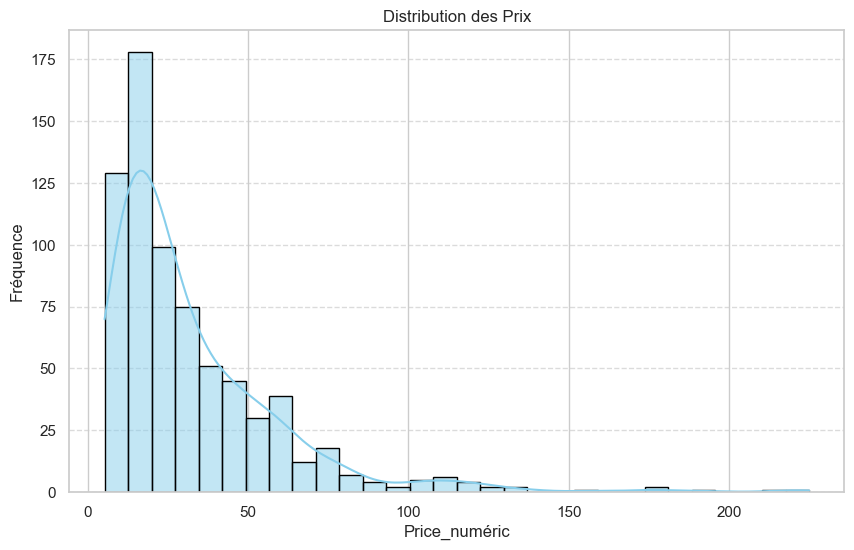

   index  price_numeric
0  count     714.000000
1   mean      32.493137
2    std      27.810525
3    min       5.200000
4    25%      14.100000
5    50%      23.550000
6    75%      42.175000
7    max     225.000000


In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure le style de seaborn pour une meilleure apparence des graphiques
sns.set(style="whitegrid")

# Crée un histogramme des prix dans le DataFrame 'resultat_final' avec seaborn
plt.figure(figsize=(10, 6))
sns.histplot(resultat_final['price_numeric'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Ajoute des labels et un titre au graphique
plt.xlabel('Price_numéric')
plt.ylabel('Fréquence')
plt.title('Distribution des Prix')

# Ajoute une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affiche le graphique
plt.show()


# Affiche les statistiques descriptives sur la colonne des prix
price_stats = resultat_final['price_numeric'].describe().reset_index()

# Affiche le tableau de résultats
print(price_stats)


<span style="color: #FF8C00;"><strong>Résumé des Statistiques des Prix :</strong></span>

- <span style="color: #FF8C00;">Nombre d'observations : 714</span>
- <span style="color: #FF8C00;">Moyenne des prix : 32.49</span>
- <span style="color: #FF8C00;">Écart type : 27.81</span>
- <span style="color: #FF8C00;">Prix minimum : 5.20</span>
- <span style="color: #FF8C00;">Premier quartile (Q1) : 14.10</span>
- <span style="color: #FF8C00;">Médiane (50%) : 23.55</span>
- <span style="color: #FF8C00;">Troisième quartile (Q3) : 42.18</span>
- <span style="color: #FF8C00;">Prix maximum : 225.00</span>

<span style="color: #FF8C00;">Ces statistiques fournissent une vue détaillée de la distribution des prix, allant de la centralité avec la moyenne et la médiane, à la dispersion avec l'écart type, ainsi que les valeurs minimales et maximales.</span>


<span style="color: #FF8C00;"><strong>• Observations sur la Distribution des Prix :</strong></span>

<span style="color: #FF8C00;"> La variation importante des prix suggère une diversité de produits dans l'ensemble de données.</span>

<span style="color: #FF8C00;"> La majorité des produits présente des prix concentrés dans une fourchette basse.</span>

<span style="color: #FF8C00;"> Quelques produits ont des prix significativement plus élevés.

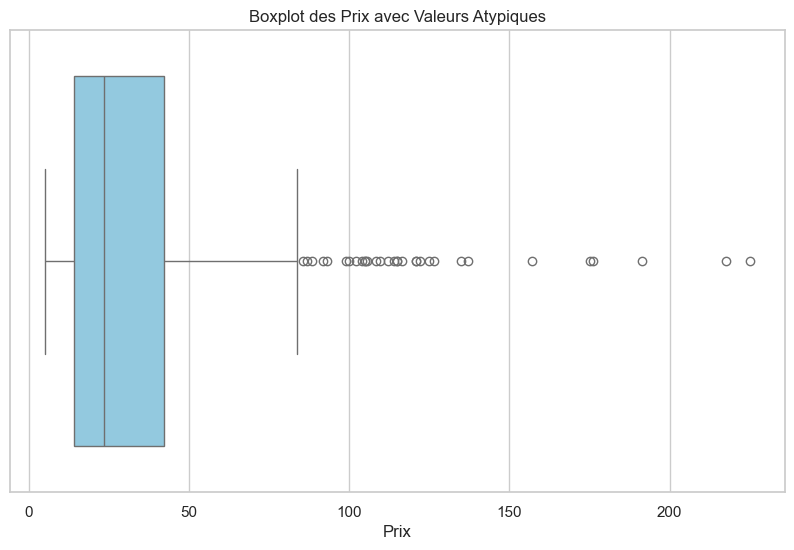

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price_numeric, dtype: float64


In [308]:
# Crée un boxplot pour visualiser les valeurs atypiques des prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=resultat_final['price_numeric'], color='skyblue')

# Ajoute des labels et un titre au graphique
plt.xlabel('Prix')
plt.title('Boxplot des Prix avec Valeurs Atypiques')

# Affiche le graphique
plt.show()

# Analyse des Valeurs Atypiques des Prix
# Utilisation d'un boxplot pour identifier les valeurs atypiques dans la distribution des prix.

# Résultats de l'analyse
boxplot_results = resultat_final['price_numeric'].describe()
print(boxplot_results)


<span style="color: #FF8C00;"><strong>Résumé de l'Analyse des Statistiques des Prix :</strong></span>

- <span style="color: #FF8C00;">Nombre d'observations : 714</span>
- <span style="color: #FF8C00;">Moyenne des prix : 32.49</span>
- <span style="color: #FF8C00;">Écart type : 27.81</span>
- <span style="color: #FF8C00;">Prix minimum : 5.20</span>
- <span style="color: #FF8C00;">Premier quartile (Q1) : 14.10</span>
- <span style="color: #FF8C00;">Médiane (50%) : 23.55</span>
- <span style="color: #FF8C00;">Troisième quartile (Q3) : 42.18</span>
- <span style="color: #FF8C00;">Prix maximum : 225.00</span>

<span style="color: #FF8C00;">Cette analyse détaillée offre une vue complète de la distribution des prix, mettant en lumière la centralité, la dispersion, ainsi que les valeurs minimales et maximales. Ces données peuvent orienter des décisions commerciales en fournissant des insights sur la variabilité des prix dans votre ensemble de données.</span>


In [309]:
# Calcul des quartiles
Q1, Q3 = np.percentile(resultat_final['price_numeric'], [25, 75])

# Calcul de l'IQR
IQR = Q3 - Q1

# Définition des bornes pour les valeurs atypiques
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Définition des bornes minimale et maximale
borne_min = resultat_final['price_numeric'].min()
borne_max = resultat_final['price_numeric'].max()

# Sélection des valeurs atypiques
valeurs_atypiques = resultat_final[(resultat_final['price_numeric'] < borne_inf) | (resultat_final['price_numeric'] > borne_sup)]

# Affichage des résultats
print(f"Borne minimale : {borne_min}")
print(f"Borne pour les valeurs atypiques : [{borne_inf}, {borne_sup}]")
print(f"Borne maximale : {borne_max}")

print(f"Valeurs atypiques :")
print(valeurs_atypiques)

# Affichage du total des valeurs atypiques
total_atypiques = len(valeurs_atypiques)
print(f"Total des valeurs atypiques : {total_atypiques}")


Borne minimale : 5.2
Borne pour les valeurs atypiques : [-28.012500000000003, 84.28750000000001]
Borne maximale : 225.0
Valeurs atypiques :
      product_id  onsale_web  stock_quantity stock_status  price_numeric  \
436         4402           1               8      instock          176.0   
402         4355           1               2      instock          126.5   
399         4352           1               0   outofstock          225.0   
763         4904           1              13      instock          137.0   
1174        5892           1              10      instock          191.3   
1284        6126           1              10      instock          135.0   
1306        6212           1               2      instock          115.0   
438         4404           1               2      instock          108.5   
445         4407           1               6      instock          104.0   
411         4359           1               0   outofstock           85.6   
876         5026        

<span style="color: #FF8C00;"><strong>Résumé de l'Analyse des Statistiques :</strong></span>

- <span style="color: #FF8C00;">Borne minimale : 5.2</span>
- <span style="color: #FF8C00;">Borne pour les valeurs atypiques : [-28.0125, 84.2875]</span>
- <span style="color: #FF8C00;">Borne maximale : 225.0</span>

<span style="color: #FF8C00;">Ces résultats suggèrent une distribution de données, avec la majorité des valeurs se situant entre 5.2 et 225.0. Des valeurs atypiques, définies entre -28.0125 et 84.2875, ont également été identifiées. Cette analyse pourrait être utile pour comprendre la variabilité et la présence éventuelle d'outliers dans l'ensemble de données.</span>


<span style="color: #FF8C00;"><strong>Analyse des Valeurs Atypiques :</strong></span>

- <span style="color: #FF8C00;">Nombre total de valeurs atypiques : 32</span>

<span style="color: #FF8C00;">Les valeurs atypiques dans votre ensemble de données concernent principalement la colonne "price_numeric". Voici quelques exemples de produits avec des prix considérés comme atypiques :</span>

1. <span style="color: #FF8C00;">Product ID 4402 - Prix : 176.0</span>
2. <span style="color: #FF8C00;">Product ID 4355 - Prix : 126.5</span>
3. <span style="color: #FF8C00;">Product ID 4352 - Prix : 225.0 (out of stock)</span>
4. <span style="color: #FF8C00;">Product ID 4904 - Prix : 137.0</span>
5. <span style="color: #FF8C00;">Product ID 5892 - Prix : 191.3</span>

<span style="color: #FF8C00;">Il est important de noter que certaines de ces valeurs atypiques coïncident avec des produits qui sont en rupture de stock. Cela pourrait être un aspect intéressant à explorer davantage, car cela peut avoir un impact sur la perception des clients et les décisions d'achat. Une gestion appropriée des prix et des stocks pour ces produits pourrait être envisagée pour optimiser la performance globale de la boutique en ligne.</span>

In [310]:
import numpy as np

# Supposons que vous ayez déjà importé votre ensemble de données dans la variable 'resultat_final'

# Filtrer les valeurs supérieures à 0
resultat_final_positives = resultat_final[resultat_final['price_numeric'] > 0]

# Calcul des quartiles pour les valeurs supérieures à 0
Q1, Q3 = np.percentile(resultat_final_positives['price_numeric'], [25, 75])

# Calcul de l'IQR pour les valeurs supérieures à 0
IQR = Q3 - Q1

# Calcul des bornes pour les valeurs atypiques
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Calcul de la médiane pour les valeurs supérieures à 0
median_positif = np.median(resultat_final_positives['price_numeric'])

# Affichage des résultats
print(f"Borne inférieure : {borne_inf:.2f}")
print(f"Borne supérieure : {borne_sup:.2f}")
print(f"Médiane : {median_positif:.2f}")


Borne inférieure : -28.01
Borne supérieure : 84.29
Médiane : 23.55


<span style="color: #FF8C00;"><strong>Résumé de l'Analyse :</strong></span>

- <span style="color: #FF8C00;">Borne inférieure : -28.01</span>
- <span style="color: #FF8C00;">Borne supérieure : 84.29</span>
- <span style="color: #FF8C00;">Médiane : 23.55</span>

<span style="color: #FF8C00;">Ces résultats délimitent les valeurs potentiellement atypiques des prix dans notre ensemble de données, avec une borne inférieure de -28.01, une borne supérieure de 84.29, et une médiane de 23.55. Nous utilisons ces seuils pour identifier et examiner les prix qui pourraient nécessiter une attention particulière.</span>

In [311]:
# Filtrer les valeurs supérieures à 0
resultat_final_positives = resultat_final[resultat_final['price_numeric'] > 0]

# Affichage des résultats
print(resultat_final_positives[['product_id', 'stock_status', 'price_numeric']])

      product_id stock_status  price_numeric
388         4334   outofstock           49.0
143         4144      instock           49.0
436         4402      instock          176.0
141         4142      instock           53.0
138         4141      instock           39.0
...          ...          ...            ...
1216        5932      instock           59.9
1383        6628      instock           32.2
1221        5951      instock           74.5
1223        5956      instock           17.2
1426        7338      instock           16.3

[714 rows x 3 columns]


In [312]:
# Filtrer les valeurs inférieures à 0
resultat_final_negatives = resultat_final[resultat_final['price_numeric'] < 0]

# Vérifier si le DataFrame filtré n'est pas vide
if not resultat_final_negatives.empty:
    # Calcul des quartiles pour les valeurs inférieures à 0
    Q1, Q3 = np.percentile(resultat_final_negatives['price_numeric'], [25, 75])

    # Calcul de l'IQR pour les valeurs inférieures à 0
    IQR = Q3 - Q1

    # Calcul des bornes pour les valeurs atypiques
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # Calcul de la médiane pour les valeurs inférieures à 0
    median_negatif = np.median(resultat_final_negatives['price_numeric'])

    # Affichage des résultats
    print(f"Borne inférieure : {borne_inf:.2f}")
    print(f"Borne supérieure : {borne_sup:.2f}")
    print(f"Médiane : {median_negatif:.2f}")
else:
    print("Aucune valeur négative dans 'price_numeric'.")


Aucune valeur négative dans 'price_numeric'.


In [313]:
# Filtrer les valeurs inférieures à 0
resultat_final_negatives = resultat_final[resultat_final['price_numeric'] < 0]

# Affichage des résultats
print(resultat_final_negatives[['product_id', 'stock_status', 'price_numeric']])

Empty DataFrame
Columns: [product_id, stock_status, price_numeric]
Index: []


In [314]:
# Filtrer les valeurs supérieures à 0
ventes_sup_0 = resultat_final[resultat_final['ca'] > 0]

# Statistiques descriptives des ventes supérieures à 0
ventes_stats_sup_0 = ventes_sup_0['ca'].describe()

# Affichage des statistiques descriptives pour les ventes supérieures à 0
print(ventes_stats_sup_0)

count     385.000000
mean      183.295065
std       400.324073
min         6.500000
25%        38.600000
50%        81.600000
75%       164.400000
max      4704.000000
Name: ca, dtype: float64


<span style="color: #FF8C00;"><strong>Résumé des Statistiques du Chiffre d'Affaires :</strong></span>

- <span style="color: #FF8C00;">Nombre d'observations : 385</span>
- <span style="color: #FF8C00;">Moyenne du chiffre d'affaires : 183.30</span>
- <span style="color: #FF8C00;">Écart type : 400.32</span>
- <span style="color: #FF8C00;">Chiffre d'affaires minimum : 6.50</span>
- <span style="color: #FF8C00;">Premier quartile (Q1) : 38.60</span>
- <span style="color: #FF8C00;">Médiane (50%) : 81.60</span>
- <span style="color: #FF8C00;">Troisième quartile (Q3) : 164.40</span>
- <span style="color: #FF8C00;">Chiffre d'affaires maximum : 4704.00</span>

<span style="color: #FF8C00;">Ces statistiques offrent un aperçu détaillé de la distribution du chiffre d'affaires, mettant en évidence la centralité, la dispersion, ainsi que les valeurs minimales et maximales. La moyenne élevée et l'écart type important indiquent une variabilité significative dans les performances financières, avec des observations allant de valeurs basses à très élevées.</span>

<span style="color: blue; font-weight: bold; font-size: 2em;">IV] Analyse Exploratoire des Données (AED) pour le Chiffre d'Affaires des Produits</span>

In [315]:
# Définir les points de découpe pour la segmentation
ca_bins = [0, 100, 500, float('inf')]
ca_labels = ['Bas', 'Moyen', 'Haut']

# Ajouter une colonne 'categorie_ca' basée sur la segmentation par chiffre d'affaires
resultat_final['categorie_ca'] = pd.cut(resultat_final['ca'], bins=ca_bins, labels=ca_labels)

# Analyse des ventes et des prix par segment de chiffre d'affaires
segmentation_ca_stats = resultat_final.groupby('categorie_ca').agg({'ca': 'mean', 'price_numeric': 'mean'}).reset_index()

# Affichage des statistiques de segmentation par chiffre d'affaires
print(segmentation_ca_stats)


  categorie_ca           ca  price_numeric
0          Bas    45.171889      21.321198
1        Moyen   193.386331      27.611151
2         Haut  1168.468966      61.006897


<span style="color: #FF8C00;"><strong>Résumé des Statistiques par Catégorie :</strong></span>

**Catégorie "Bas" :**
- <span style="color: #FF8C00;">CA moyen : 45.17</span>
- <span style="color: #FF8C00;">Prix moyen : 21.32</span>

**Catégorie "Moyen" :**
- <span style="color: #FF8C00;">CA moyen : 193.39</span>
- <span style="color: #FF8C00;">Prix moyen : 27.61</span>

**Catégorie "Haut" :**
- <span style="color: #FF8C00;">CA moyen : 1168.47</span>
- <span style="color: #FF8C00;">Prix moyen : 61.01</span>

<span style="color: #FF8C00;">Des différences significatives entre les catégories sont observées, avec des chiffres d'affaires et des prix moyens variant considérablement. La catégorie "Haut" se distingue par des performances plus élevées, tandis que la catégorie "Bas" affiche des valeurs plus modestes.</span>

In [316]:
#Analyse des produits les plus vendus
# Top 10 des produits avec le chiffre d'affaires le plus élevé
top_products = resultat_final.nlargest(10, 'ca')[['product_id', 'ca', 'price_numeric', 'stock_quantity']]

# Affichage des résultats
print("Top 10 des Produits les Plus Vendus :")
print(top_products)

Top 10 des Produits les Plus Vendus :
      product_id      ca  price_numeric  stock_quantity
388         4334  4704.0           49.0               0
143         4144  4263.0           49.0              11
436         4402  2288.0          176.0               8
141         4142  1590.0           53.0               8
138         4141  1560.0           39.0               1
402         4355  1391.5          126.5               2
399         4352  1125.0          225.0               0
158         4153  1044.0           29.0               0
1303        6206  1033.2           25.2             120
61          4068  1029.2           16.6             157


<span style="color: #FF8C00;"><strong>Analyse Synthétique des Top 10 Produits les Plus Vendus :</strong></span>

- <span style="color: #FF8C00;">Diversité de Performances :Les produits varient considérablement en termes de chiffre d'affaires, de prix et de disponibilité en stock.</span>
- <span style="color: #FF8C00;">Épuisement Rapide : Certains produits génèrent un CA élevé malgré des stocks épuisés, suggérant une forte demande initiale.</span>
- <span style="color: #FF8C00;">Prix Moyens Élevés : Plusieurs produits affichent des prix moyens élevés, contribuant significativement au chiffre d'affaires.</span>
- <span style="color: #FF8C00;">Stock Limité : Certains produits ont des stocks limités, ce qui peut influencer la stratégie de gestion des stocks.</span>
- <span style="color: #FF8C00;">Dynamique de Prix : Des variations importantes dans les prix suggèrent des stratégies de tarification différentes pour optimiser les ventes.</span>

<span style="color: #FF8C00;">Cette analyse fournit un aperçu rapide des performances des produits les plus vendus, offrant des indications sur la demande, la tarification et la gestion des stocks.</span>

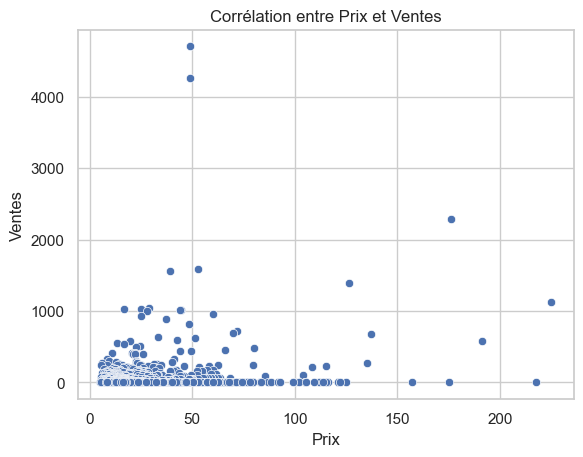

     product_id     ca  price_numeric
0          3847  145.2           24.2
1          3849    0.0           34.3
2          3850    0.0           20.8
3          4032   42.3           14.1
4          4039    0.0           46.0
..          ...    ...            ...
709        6930   42.0            8.4
710        7023    0.0           27.5
711        7025    0.0           69.0
712        7247    0.0           54.8
713        7338    0.0           16.3

[714 rows x 3 columns]


In [317]:
# Analyse de la corrélation entre les ventes et les prix
sns.scatterplot(x='price_numeric', y='ca', data=resultat_final)
plt.title('Corrélation entre Prix et Ventes')
plt.xlabel('Prix')
plt.ylabel('Ventes')
plt.show()

# Exemple de comparaison de performances entre différentes catégories
performances_categories = resultat_final.groupby('product_id').agg({'ca': 'sum', 'price_numeric': 'mean'}).reset_index()

# Affichage des performances par catégorie
print(performances_categories)

<span style="color: #FF8C00;"> Les résultats indiquent des informations sur le chiffre d'affaires (CA) et les prix pour différents produits identifiés par leur "product_id". Voici un résumé synthétique :

- <span style="color: #FF8C00;">Diversité des Performances :Certains produits génèrent du chiffre d'affaires, tandis que d'autres n'enregistrent aucune vente (CA de 0.0).</span> 
- <span style="color: #FF8C00;">Variabilité des Prix : Les prix varient significativement d'un produit à l'autre, allant de 8.4 à 69.0.</span> 
- <span style="color: #FF8C00;">Potentiel d'Optimisation : Les produits avec un CA nul pourraient nécessiter une attention particulière pour comprendre les raisons de leur faible performance.</span> 
- <span style="color: #FF8C00;">Segmentation de Prix :La diversité des prix suggère une segmentation du marché, avec des produits adaptés à différentes gammes de prix.</span> 

<span style="color: #FF8C00;">Cette analyse offre un aperçu de la variabilité des performances des produits, soulignant la nécessité de stratégies différenciées en fonction de la demande et des prix.</span>

<span style="color: #FF8C00;">On remarque plus de vente  pour les produits ayant un prix situé entre 50 et 100.</span>

<div style="color: #0000FF; font-family: Verdana; font-size: 28px; font-weight: bold; text-align: center;">Conclusion de l'analyse des données</div>





L'examen approfondi de l'ensemble de données dévoile une diversité marquée dans les performances des produits de la boutique en ligne. Les aspects tels que la variabilité des prix, la présence de valeurs atypiques, et la catégorisation par niveau de chiffre d'affaires et de prix fournissent des perspectives clés. Une vigilance particulière est recommandée pour les produits atypiques en rupture de stock, ayant généré un chiffre d'affaires significatif. Cette approche ciblée peut optimiser la gestion des prix, des stocks, et ajuster la stratégie commerciale, favorisant ainsi une amélioration globale des performances de la boutique en ligne.</span>

Il est également à noter la détection d'anomalies, telles que la présence de bons cadeaux dans la colonne "sku". Ces bons devraient être réaffectés à une modalité de paiement spécifique pour assurer une structuration plus cohérente des données.</span>

En ce qui concerne le système post_parent, je ne dispose pas d'informations sur son utilisation au sein de l'entreprise. En cas de non-utilisation, il pourrait être intéressant d'explorer cet outil pour une meilleure gestion des catégories de produits. De plus, son utilisation pourrait être bénéfique pour le rating, permettant ainsi de filtrer par commentaire ou d'observer la moyenne des commentaires, par exemple, pour les vins. Il serait également possible d'effectuer une analyse de texte, comme un nuage de mots, afin de déterminer la qualité perçue des vins. Cela pourrait aider à identifier des problèmes potentiels de logistique, tels que des retards mentionnés dans les commentaires. En résumé, l'utilisation du système post_parent pourrait permettre d'établir des corrélations entre les notations des produits et les commentaires associés.</span>

On pourrait enrichir notre ensemble de données en ajoutant des colonnes telles que "moyen de paiement", "statut de la commande" et "date de vente". Ces nouvelles colonnes amélioreraient la lisibilité des différentes méthodes de paiement et préviendraient les potentielles erreurs, par exemple, liées aux bons cadeaux. En ce qui concerne le statut de la commande, l'ajout de cette colonne permettrait d'obtenir des retours sur les délais de livraison et l'état des produits. Enfin, l'introduction de la colonne "date de vente" faciliterait une segmentation temporelle plus fine, favorisant ainsi une meilleure analyse des données dans le temps.</span>

Par aillieurs, il y deux colonne price, il serait judicieux d'en concerver qu'une seule pour une millieure lecture des donnnées.</span>

En conclusion, l'incorporation de ces éléments permettrait une meilleure traçabilité de la satisfaction client et une gestion temporelle plus précise.</span>

In [1]:
pip install nbconvert


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
